In [ ]:
# Multilayer Perceptron (MLP) for multi-class softmax classification

In [21]:
# Import the dependencies

%matplotlib inline
import matplotlib.pyplot as plt #For Plots
import pandas as pd #For DataFrame
import numpy as np #For scientific computing with Python

In [22]:
# Import Keras dependencies

import keras

from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Dense, Dropout, Flatten
from keras.models import load_model
from keras.callbacks import ModelCheckpoint

In [23]:
batch_size = 256
num_classes = 10
epochs = 10

In [24]:
Emnist_file_path = "emnist/"

In [25]:
All_train = Emnist_file_path + 'emnist-digits-train.csv'
All_test = Emnist_file_path + 'emnist-digits-test.csv'

In [26]:
All_train_data = pd.read_csv(All_train)
All_test_data = pd.read_csv(All_test)

In [27]:
All_training_data = All_train_data.values
All_testing_data = All_test_data.values

In [28]:
print(type(All_training_data))
print(type(All_testing_data))
print(All_training_data.shape)
print(All_testing_data.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(239999, 785)
(39999, 785)


In [29]:
x_train = All_training_data[:, 1:].astype('float32')
y_train = All_training_data[:, 0:1]
print('x_train shape : ', x_train.shape)
print('y_train shape : ', y_train.shape)

x_train shape :  (239999, 784)
y_train shape :  (239999, 1)


In [30]:
x_test = All_testing_data[:, 1:].astype('float32')
y_test = All_testing_data[:, 0:1]
print('x_test shape : ', x_test.shape)
print('y_test shape : ', y_test.shape)

x_test shape :  (39999, 784)
y_test shape :  (39999, 1)


In [31]:
x_train = np.array(list(map(lambda x : x.reshape(28, 28).transpose().flatten(), x_train)))
x_test = np.array(list(map(lambda x : x.reshape(28, 28).transpose().flatten(), x_test)))

In [32]:
print(type(x_train))
print('x_train shape : ', x_train.shape)

<class 'numpy.ndarray'>
x_train shape :  (239999, 784)


In [33]:
print(type(x_test))
print('x_test shape : ', x_test.shape)

<class 'numpy.ndarray'>
x_test shape :  (39999, 784)


data  3456  :  [8]


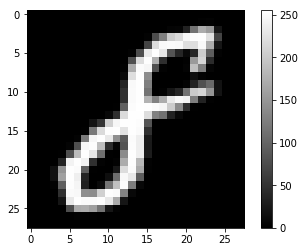

In [34]:
# Print the i data 
i = 3456
plt.imshow(x_test[i].reshape(28, 28),cmap='gray')
plt.colorbar()
print('data ', i, ' : ', y_test[i])

In [35]:
# Scale from 0 to 255

x_train /= 255
x_test /= 255

In [ ]:
# Make it 0 based indices

y_train = y_train - 1
y_test = y_test - 1

In [36]:
# Convert labels to categorical one-hot encoding

y_train = keras.utils.to_categorical(y_train, num_classes = num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes = num_classes)

In [37]:
# Define the Model Architecture # Define the model with 10 classes (categorical classification):

model = Sequential()
model.add(Dense(512, activation='relu',input_shape=(784,)))
# model.add(Dropout(0.25))
model.add(Dense(512, activation='relu'))
# model.add(Dropout(0.25))
model.add(Dense(512, activation='relu'))
# model.add(Dropout(0.25))
model.add(Dense(512, activation='relu'))
# model.add(Dropout(0.25))
model.add(Dense(512, activation='relu'))
# model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))

In [38]:
# Summarize the model

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_4 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                5130      
Total params: 1,457,674
Trainable params: 1,457,674
Non-trainable params: 0
_________________________________________________________________


In [39]:
# Compile the Model (optimizer can be 'adagrad' or rmsprop also)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [40]:
# Calculate the Classification Accuracy on the Test Set (Before Training)

score = model.evaluate(x_test, y_test, verbose=0)
accuracy = 100*score[1]
print('Before Training - Test accuracy: %.4f%%' % accuracy)

Before Training - Test accuracy: 10.0003%


In [41]:
checkpointer = ModelCheckpoint(filepath='emnist.digits.dense.model.best.hdf5', verbose=3, save_best_only=True)

In [42]:
# Train the model, iterating on the data in batches of 256 samples with epochs 10

Trained_Model = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2, callbacks=[checkpointer],
                    verbose=3, shuffle=True)

Train on 191999 samples, validate on 48000 samples
Epoch 1/10

Epoch 00001: val_loss improved from inf to 0.07713, saving model to emnist.digits.dense.model.best.hdf5
Epoch 2/10

Epoch 00002: val_loss improved from 0.07713 to 0.04935, saving model to emnist.digits.dense.model.best.hdf5
Epoch 3/10

Epoch 00003: val_loss improved from 0.04935 to 0.04888, saving model to emnist.digits.dense.model.best.hdf5
Epoch 4/10

Epoch 00004: val_loss improved from 0.04888 to 0.04801, saving model to emnist.digits.dense.model.best.hdf5
Epoch 5/10

Epoch 00005: val_loss did not improve from 0.04801
Epoch 6/10

Epoch 00006: val_loss did not improve from 0.04801
Epoch 7/10

Epoch 00007: val_loss improved from 0.04801 to 0.04781, saving model to emnist.digits.dense.model.best.hdf5
Epoch 8/10

Epoch 00008: val_loss did not improve from 0.04781
Epoch 9/10

Epoch 00009: val_loss did not improve from 0.04781
Epoch 10/10

Epoch 00010: val_loss did not improve from 0.04781


In [43]:
# Load the Model with the Best Classification Accuracy on the Validation Set

model.load_weights('emnist.digits.dense.model.best.hdf5')

In [44]:
# Save the best model

model.save('eminst_digits_dense_model.h5')

In [45]:
# Evaluate test accuracy

score = model.evaluate(x_test, y_test, verbose=0)
accuracy = 100*score[1]
loss = 100*score[0]

print('Test accuracy: %.4f%%' % accuracy)
print('Test loss: %.4f%%' % loss)

Test accuracy: 98.8850%
Test loss: 3.9529%


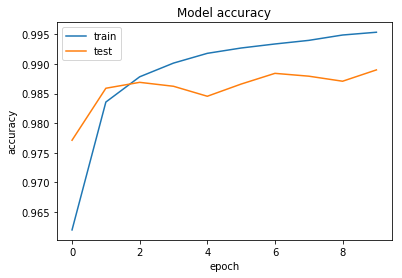

In [46]:
# Summarize history for accuracy

plt.plot(Trained_Model.history['acc'])
plt.plot(Trained_Model.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# Summarize history for loss

plt.plot(Trained_Model.history['loss'])
plt.plot(Trained_Model.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Making Predictions
We can use our trained model to make predictions using model.predict

In [ ]:
test = np.expand_dims(x_train[i], axis=0)
test.shape

In [ ]:
# Print the i data 

plt.imshow(x_test[i].reshape(28, 28),cmap='gray')
plt.colorbar()
print('data ', i, ' : ', y_test[i])

In [ ]:
# Make a prediction. The resulting class should match the digit

print(f"One-Hot-Encoded Prediction: {model.predict(test).round()}")
print(f"Predicted class: {model.predict_classes(test)}")

In [ ]:
filepath = "uploads/num7.png"

In [ ]:
from keras.preprocessing import image
image_size = (28, 28)
im = image.load_img(filepath, target_size=image_size, grayscale=True)
im

In [ ]:
# Convert the image to a numpy array 

from keras.preprocessing.image import img_to_array
image = img_to_array(im)
image.shape

In [ ]:
# Scale the image pixels by 255 (or use a scaler from sklearn here)
image /= 255

# Flatten into a 1x28*28 array 
img = image.flatten().reshape(-1, 28*28)
img.shape

In [ ]:
plt.imshow(img.reshape(28, 28), cmap=plt.cm.Greys)

In [ ]:
# Invert the pixel values to match the original data
img = 1 - img
plt.imshow(img.reshape(28, 28), cmap=plt.cm.Greys)

In [ ]:
# Make predictions

print(f"One-Hot-Encoded Prediction: {model.predict(img).round()}")
print(f"Predicted class: {model.predict_classes(img)}")

In [ ]:
#1,2,4`,5`,7,8`

In [ ]:
# 1, 2, 4, 8...sometimes 5